Quickly analyze test market campaigns based on responses, revenue and other key metrics. Predict who will respond to which campaign by which channel and why. Increase the likelihood of responses and quality of leads in future campaigns.


### Exploratory Data Analysis 

In [1]:
import pandas as pd
import matplotlib as pyplot
%matplotlib inline

In [2]:
df = pd.read_csv('marketing_data.csv')

In [3]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [4]:
df.tail()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29
547,10,Large,920,14,2,4,49.41


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
MarketID            548 non-null int64
MarketSize          548 non-null object
LocationID          548 non-null int64
AgeOfStore          548 non-null int64
Promotion           548 non-null int64
week                548 non-null int64
SalesInThousands    548 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.0+ KB


In [6]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [7]:
df.columns

Index([u'MarketID', u'MarketSize', u'LocationID', u'AgeOfStore', u'Promotion',
       u'week', u'SalesInThousands'],
      dtype='object')

In [8]:
df['week'].value_counts()

4    137
3    137
2    137
1    137
Name: week, dtype: int64

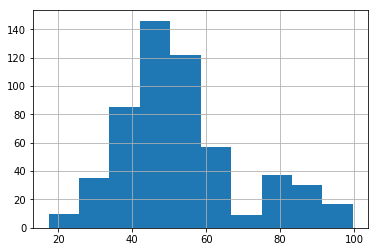

In [9]:
df['SalesInThousands'].hist()

In [10]:
df['Promotion'].value_counts()

3    188
2    188
1    172
Name: Promotion, dtype: int64

In [11]:
df['MarketSize'].value_counts()

Medium    320
Large     168
Small      60
Name: MarketSize, dtype: int64

In [12]:
len(df['LocationID'].value_counts())

137

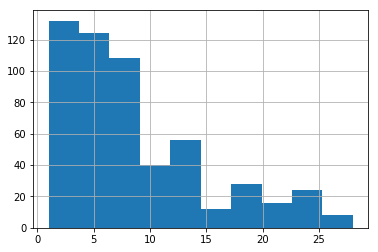

In [13]:
df['AgeOfStore'].hist()

In [14]:
df['MarketID'].value_counts()

3     88
10    80
7     60
6     60
5     60
1     52
8     48
9     40
4     36
2     24
Name: MarketID, dtype: int64

In [15]:
y = df['SalesInThousands']
X = df.drop('SalesInThousands', axis = 1)

In [16]:
dummy_vars = pd.get_dummies(df['MarketSize'])
X.drop('MarketSize', axis = 1, inplace = True)
X = pd.concat([X,dummy_vars], axis = 1 )

In [17]:
X.head()

,MarketID,LocationID,AgeOfStore,Promotion,week,Large,Medium,Small
0,1,1,4,3,1,0,1,0
1,1,1,4,3,2,0,1,0
2,1,1,4,3,3,0,1,0
3,1,1,4,3,4,0,1,0
4,1,2,5,2,1,0,1,0


### Fitting a RandomForestRegressor Model

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
rfr = RandomForestRegressor()
rfm = rfr.fit(X_train, y_train)
#rfm.predict(X_train)
rfm.score(X_test, y_test)

0.85087809557544669

In [22]:
rfm.transform(X_test.iloc[1,])

/home/rnjeri/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/rnjeri/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[808,   0,   1]])

In [24]:
rfm.transform(X_test.iloc[12,])

/home/rnjeri/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/rnjeri/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[402,   0,   1]])